In [57]:
import os
import SimpleITK as sitk
import numpy as np
import pandas as pd 
import cv2
import math 

from os import walk
import matplotlib.pylab as plt


In [94]:
images_path = '../dataset/'
test_image = "../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd"
IMG_SIZE = 64
PLT_HEIGHT = 4
PLT_WIDTH = 8

DATA_IMAGES = 1
DATA_DEPTH = PLT_HEIGHT*PLT_WIDTH


In [59]:
def load_image(filename):
    image = sitk.ReadImage(filename)
    ct_scan = sitk.GetArrayFromImage(image)

    return ct_scan

In [60]:
images = []
for (dirpath, dirnames, files) in walk(images_path):
    for file in files:
        if file.endswith(".mhd"):
            images.append(images_path+file)


In [103]:
def chunks(l,n):
    start = 0
    for i in np.arange(0, len(l)-1, n):
        end = math.floor(i+n)
        yield l[start:end]
        start = end

In [88]:
def mean(l):
    return sum(l)/len(l)

(32, 64, 64)


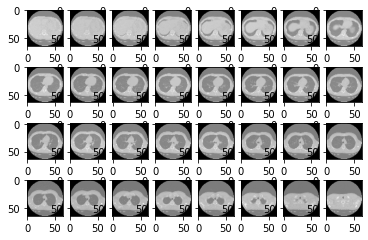

(32, 64, 64)


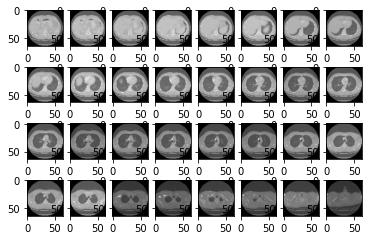

(32, 64, 64)


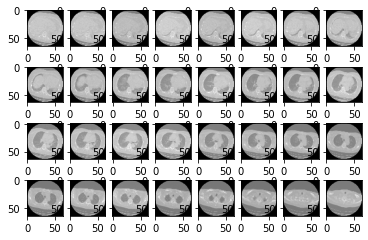

(32, 64, 64)


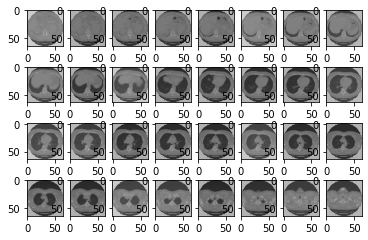

(32, 64, 64)


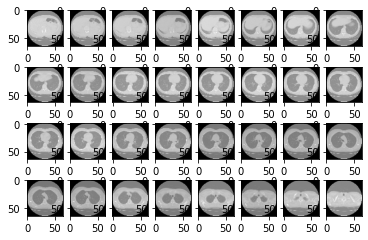

(32, 64, 64)


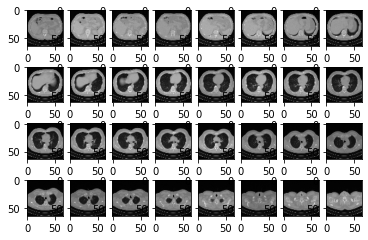

(32, 64, 64)


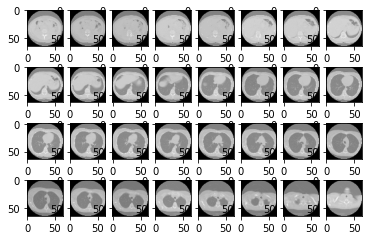

(32, 64, 64)


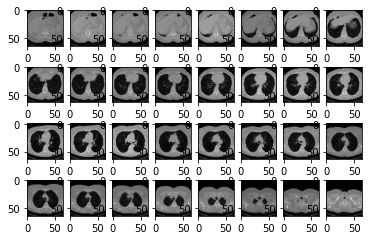

(32, 64, 64)


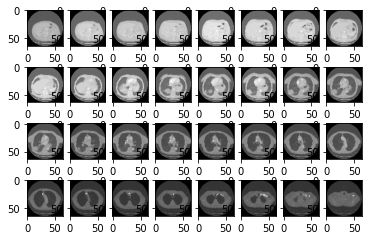

(32, 64, 64)


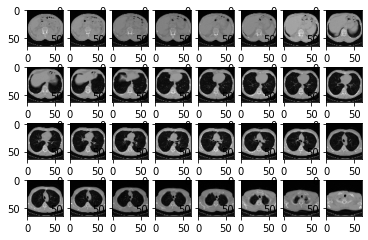

(32, 64, 64)


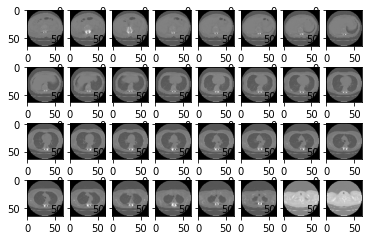

(32, 64, 64)


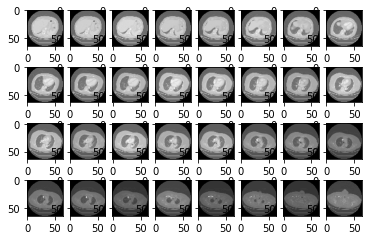

(32, 64, 64)


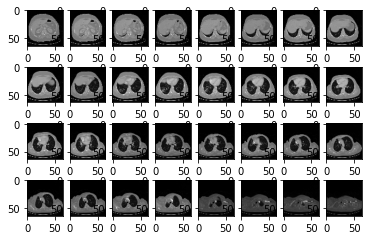

(32, 64, 64)


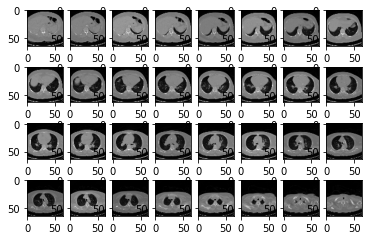

(32, 64, 64)


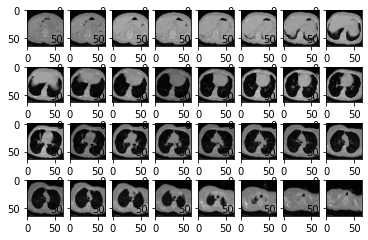

(32, 64, 64)


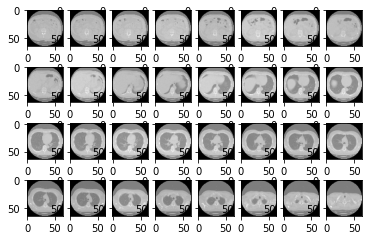

(32, 64, 64)


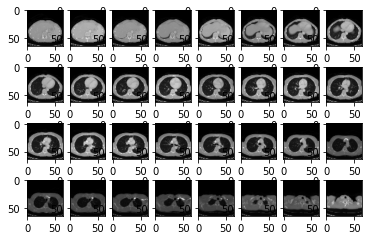

(32, 64, 64)


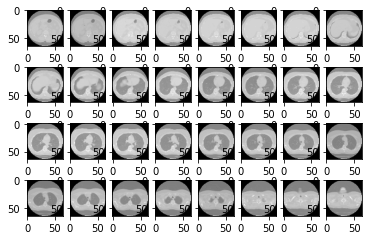

(32, 64, 64)


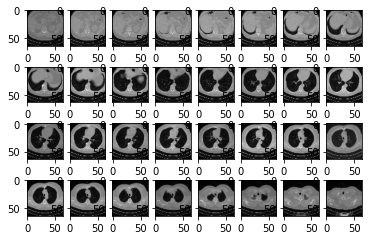

(32, 64, 64)


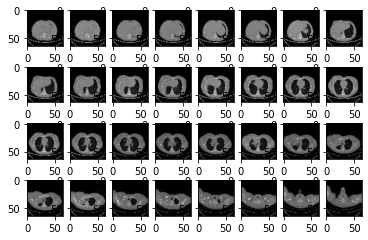

In [104]:
for image_path in images[:20]:
    new_slices = []
    scan = load_image(image_path)
    
    slices = [cv2.resize(image,(IMG_SIZE,IMG_SIZE)) for image in scan]
    
    chuck_size = len(slices) / DATA_DEPTH
    for slice_chunk in chunks(slices,chuck_size):
    
        slice_chunk = list(map(mean,zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    
    print(np.shape(new_slices))
    draw_slices(new_slices)

In [97]:
def draw_slices(slices):
    fig = plt.figure()
    
    for i,testSlice in enumerate(slices):
        subplot = fig.add_subplot(PLT_HEIGHT,PLT_WIDTH,i+1)
        subplot.imshow(testSlice, cmap='gray')
    plt.show()